# App usage analyser (with privacy insights)

### Mini - Project (Team 3 - Chandhna and Harish)

#### Objectives:
This project analyses mobile app usage data to gain insights into:
- time spent on each app
- app categories (eg; social and productivity)
- permissions used by each app
- identifying apps with high privacy risk based on permissions and usage time

### Libraries used:
In this project we have used mainly 2 libraries:
- 'Pandas' for data handling
- 'Matplotlib' and 'plotly' for visualizations

### CODE:

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import plotly.express as px

In [5]:
import random

In [12]:
apps = [
    ("WhatsApp", "Social"),
    ("YouTube", "Entertainment"),
    ("Instagram", "Social"),
    ("Google Maps", "Navigation"),
    ("Zoom", "Productivity"),
    ("Gmail", "Productivity"),
    ("TikTok", "Entertainment"),
    ("Facebook", "Social"),
    ("Spotify", "Entertainment"),
    ("Google Drive", "Productivity"),
]

permissions_list = ["Camera", "Location", "Contacts", "Microphone", "Storage", "SMS"]

data = []
for app, category in apps:
    time_spent = random.randint(20, 300)
    permissions = random.sample(permissions_list, random.randint(2, 5))
    data.append({
        "App Name": app,
        "Category": category,
        "Time Spent (mins)": time_spent,
        "Permissions Used": ", ".join(permissions)
    })

df = pd.DataFrame(data)
df.head(10)


,App Name,Category,Time Spent (mins),Permissions Used
0,WhatsApp,Social,167,"Storage, Location, Camera, Contacts, SMS"
1,YouTube,Entertainment,199,"Location, Storage, Contacts, Camera, SMS"
2,Instagram,Social,280,"Camera, Microphone"
3,Google Maps,Navigation,67,"Camera, Microphone"
4,Zoom,Productivity,112,"SMS, Location, Contacts"
5,Gmail,Productivity,184,"Contacts, Location, SMS"
6,TikTok,Entertainment,264,"Camera, Contacts, Storage, SMS, Microphone"
7,Facebook,Social,86,"Location, SMS"
8,Spotify,Entertainment,94,"Camera, Contacts, Storage, Location"
9,Google Drive,Productivity,252,"Contacts, Location, Microphone, Storage, Camera"


In [13]:
df['Permission Count'] = df['Permissions Used'].apply(lambda x: len(x.split(', ')))

def get_risk_level(row):
    if row['Permission Count'] >= 4 and row['Time Spent (mins)'] > 200:
        return 'High'
    elif row['Permission Count'] >= 3:
        return 'Medium'
    else:
        return 'Low'

df['Privacy Risk Level'] = df.apply(get_risk_level, axis=1)
df


,App Name,Category,Time Spent (mins),Permissions Used,Permission Count,Privacy Risk Level
0,WhatsApp,Social,167,"Storage, Location, Camera, Contacts, SMS",5,Medium
1,YouTube,Entertainment,199,"Location, Storage, Contacts, Camera, SMS",5,Medium
2,Instagram,Social,280,"Camera, Microphone",2,Low
3,Google Maps,Navigation,67,"Camera, Microphone",2,Low
4,Zoom,Productivity,112,"SMS, Location, Contacts",3,Medium
5,Gmail,Productivity,184,"Contacts, Location, SMS",3,Medium
6,TikTok,Entertainment,264,"Camera, Contacts, Storage, SMS, Microphone",5,High
7,Facebook,Social,86,"Location, SMS",2,Low
8,Spotify,Entertainment,94,"Camera, Contacts, Storage, Location",4,Medium
9,Google Drive,Productivity,252,"Contacts, Location, Microphone, Storage, Camera",5,High


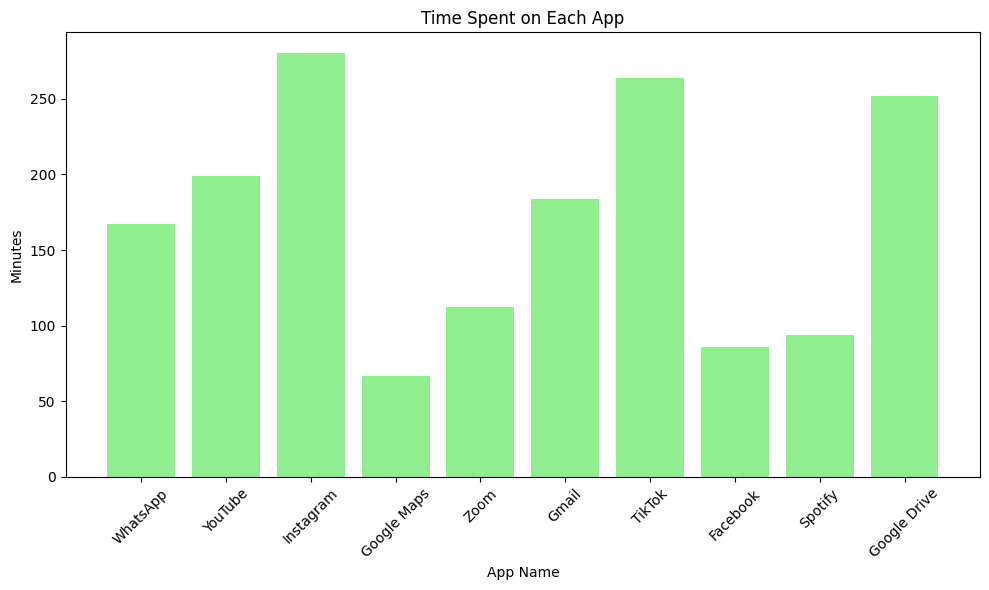

In [14]:
plt.figure(figsize=(10,6))
plt.bar(df['App Name'], df['Time Spent (mins)'], color='lightgreen')
plt.title('Time Spent on Each App')
plt.xlabel('App Name')
plt.ylabel('Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


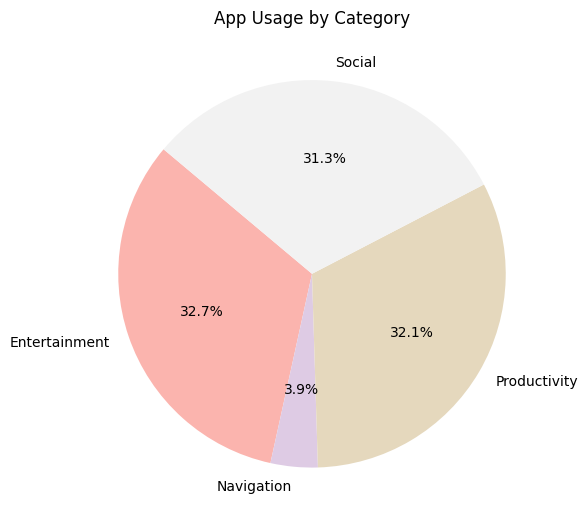

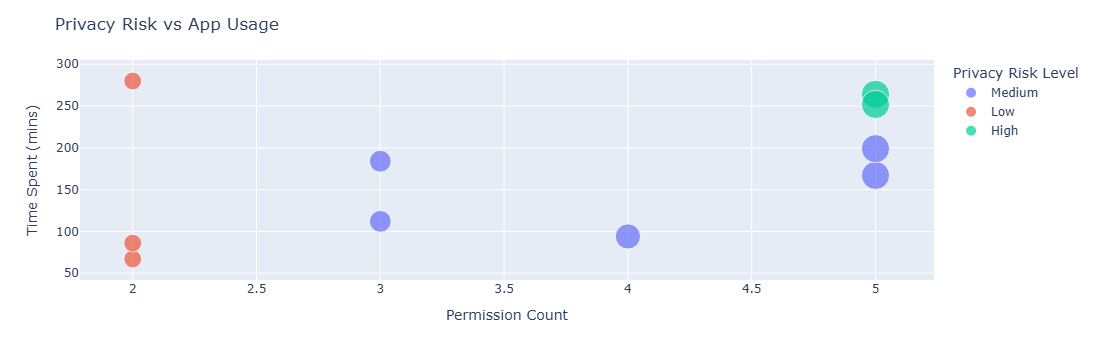

In [17]:
category_data = df.groupby('Category')['Time Spent (mins)'].sum()
category_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6,6), colormap='Pastel1')
plt.title('App Usage by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

fig = px.scatter(df, x='Permission Count', y='Time Spent (mins)', color='Privacy Risk Level',
                 size='Permission Count', hover_data=['App Name', 'Permissions Used'])
fig.update_layout(title='Privacy Risk vs App Usage')
fig.show()


In [18]:
print("Final App Usage and Privacy Risk Data:\n")
print(df)


Final App Usage and Privacy Risk Data:

       App Name       Category  Time Spent (mins)  \
0      WhatsApp         Social                167   
1       YouTube  Entertainment                199   
2     Instagram         Social                280   
3   Google Maps     Navigation                 67   
4          Zoom   Productivity                112   
5         Gmail   Productivity                184   
6        TikTok  Entertainment                264   
7      Facebook         Social                 86   
8       Spotify  Entertainment                 94   
9  Google Drive   Productivity                252   

                                  Permissions Used  Permission Count  \
0         Storage, Location, Camera, Contacts, SMS                 5   
1         Location, Storage, Contacts, Camera, SMS                 5   
2                               Camera, Microphone                 2   
3                               Camera, Microphone                 2   
4               